# Import the necessary packages and define the path to the phaseb_data directory as well as the new directory you would like to save the altered files to. 

In [5]:
from astropy.io import fits
import astropy.units as u
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'image.origin': 'lower'})
import os
from pathlib import Path

import roman_phasec_proper as phasec
spcdir_old = Path(phasec.data_dir+'/spc_20200610_wfov')

import cgi_phasec_poppy
spcdir = cgi_phasec_poppy.data_dir/'spc-wide' # path to new directory

from cgi_phasec_poppy import misc

pupil_diam = 2.363114*u.m
pupil_diam_pix = 1000*u.pixel

# Add pupil scales to the pupil files.

(1001, 1001)
(1002, 1002)
/groups/douglase/kians-data-files/roman-cgi-phasec-data/spc-wide/pupil_SPC-20200610_1000.fits


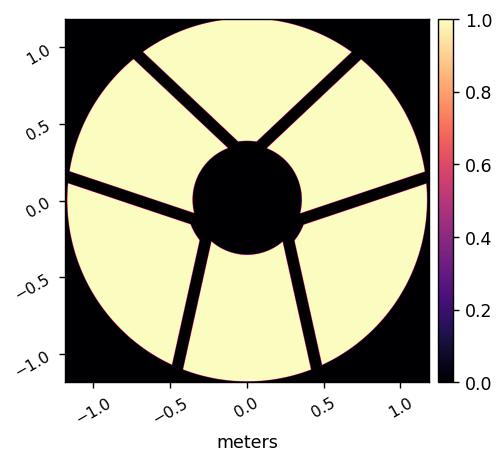

In [6]:
pupil_fname = 'pupil_SPC-20200610_1000.fits'

spc825pup = fits.open(spcdir_old/pupil_fname)
spc825pup_data = spc825pup[0].data
# print(spc825pup[0].header)
spc825pup.close()

print(spc825pup_data.shape)
arr = np.zeros(shape=(1002,1002))
arr[1:,1:] = spc825pup_data
# arr[:-1,:-1] = spc825pup_data
spc825pup_data = arr
print(spc825pup_data.shape)

hdr = fits.Header()
hdr['PUPLSCAL'] = pupil_diam.value/pupil_diam_pix.value
hdr['PIXELSCL'] = pupil_diam.value/pupil_diam_pix.value
spc825pup_new = fits.PrimaryHDU(data=spc825pup_data, header=hdr)
spc825pup_new.writeto(spcdir/pupil_fname, overwrite=True)
print(spcdir/pupil_fname)
misc.myimshow(spc825pup_data, pxscl=pupil_diam/pupil_diam_pix)

# Add pupil scales to the pupil mask files.

(1001, 1001)
/groups/douglase/kians-data-files/roman-cgi-phasec-data/spc-wide/SPM_SPC-20200610_1000_rounded9_gray.fits
(1002, 1002)


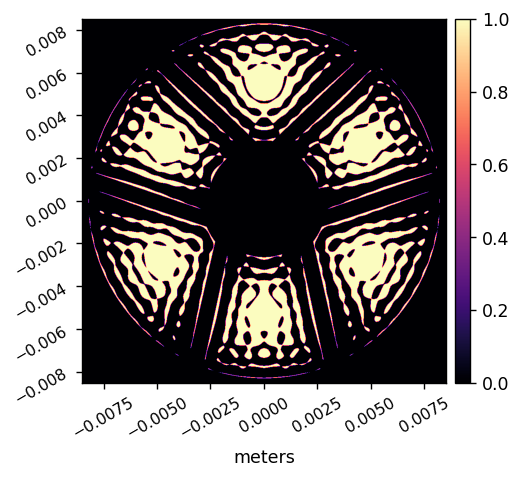

(1001, 1001)
/groups/douglase/kians-data-files/roman-cgi-phasec-data/spc-wide/SPM_SPC-20200610_1000_rounded9_gray_rotated.fits
(1002, 1002)


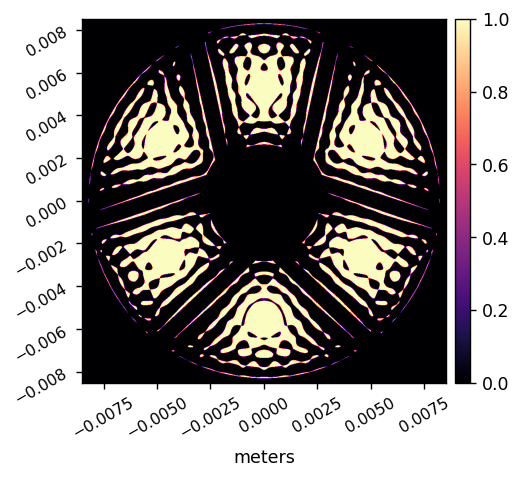

In [3]:
spm_fnames = ['SPM_SPC-20200610_1000_rounded9_gray.fits','SPM_SPC-20200610_1000_rounded9_gray_rotated.fits']
spm_sampling = 1.7000139742947902e-05*u.m/u.pixel

for fname in spm_fnames:
    spc825spm = fits.open(spcdir_old/fname)
    spc825spm_data = spc825spm[0].data
    spc825spm.close()
    
    print(spc825spm_data.shape)
    arr = np.zeros(shape=(1002,1002))
    arr[1:,1:] = spc825spm_data
#     arr[:-1,:-1] = spc825spm_data
    spc825spm_data = arr
    
    hdr = fits.Header()
    hdr['PIXELSCL'] = spm_sampling.value
    spc825spm_new = fits.PrimaryHDU(data=spc825spm_data, header=hdr)
    spc825spm_new.writeto(spcdir/fname, overwrite=True)
    print(spcdir/fname)
    print(spc825spm_data.shape)
    misc.myimshow(spc825spm_data, pxscl=spm_sampling)

# Add pixel scales to the FPM files.

8.25e-07 0.16666666666666666 0.012001710818426768 arcsec / pix
(245, 245)
(246, 246)
/groups/douglase/kians-data-files/roman-cgi-phasec-data/spc-wide/SPM_SPC-20200610_1000_rounded9_gray_rotated.fits


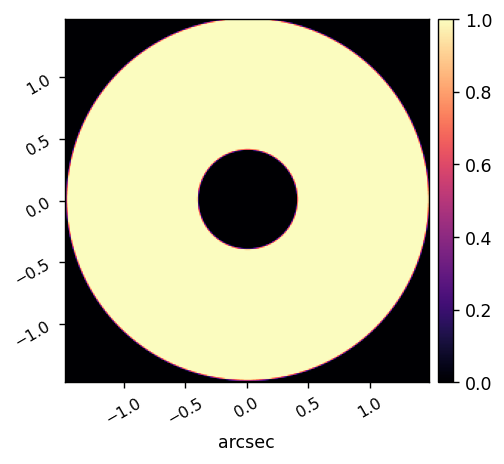

In [4]:
fpm_fname = 'FPM_SPC-20200610_res6.fits'

spc825fpm = fits.open(spcdir_old/fpm_fname)
spc825fpm_data = spc825fpm[0].data
spc825fpm.close()

fpm_lambda_m = 825e-9
fpm_pxscl_lamD = 1/6
fpm_pxscl_as = (fpm_pxscl_lamD*(fpm_lambda_m/pupil_diam.value)*u.radian/u.pix).to(u.arcsec/u.pix)
print(fpm_lambda_m, fpm_pxscl_lamD, fpm_pxscl_as)

print(spc825fpm_data.shape)
arr = np.zeros(shape=(245+1,245+1))
arr[1:,1:] = spc825fpm_data
# arr[:-1,:-1] = spc825fpm_data
spc825fpm_data = arr
print(spc825fpm_data.shape)

print(spcdir/fname)
hdr = fits.Header()
hdr['PIXELSCL'] = fpm_pxscl_as.value
hdr['PIXSCLLD'] = fpm_pxscl_lamD
hdr['WAVELENC'] = fpm_lambda_m
hdr['PUPLDIAM'] = pupil_diam.value
spc825fpm_new = fits.PrimaryHDU(data=spc825fpm_data, header=hdr)
spc825fpm_new.writeto(str(spcdir/fpm_fname), overwrite=True)

misc.myimshow(spc825fpm_data, pxscl=fpm_pxscl_as)


8.25e-07 0.1 0.007201026491056061 arcsec / pix
(411, 411)
/groups/douglase/kians-data-files/roman-cgi-phasec-data/spc-wide/SPM_SPC-20200610_1000_rounded9_gray_rotated.fits


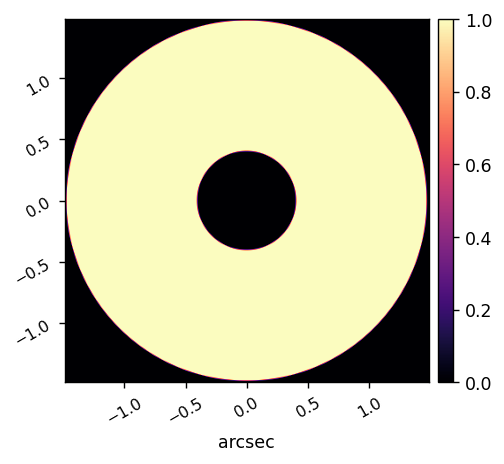

In [8]:
fpm_fname = 'FPM_SPC-20200610_0.1_lamc_div_D.fits'

spc825fpm = fits.open(spcdir_old/fpm_fname)
spc825fpm_data = spc825fpm[0].data
spc825fpm.close()

fpm_lambda_m = 825e-9
fpm_pxscl_lamD = 0.1
fpm_pxscl_as = (fpm_pxscl_lamD*(fpm_lambda_m/pupil_diam.value)*u.radian/u.pix).to(u.arcsec/u.pix)
print(fpm_lambda_m, fpm_pxscl_lamD, fpm_pxscl_as)

print(spc825fpm_data.shape)
arr = np.zeros(shape=(412, 412))
# arr[1:,1:] = spc825fpm_data
arr[:-1,:-1] = spc825fpm_data
spc825fpm_data = arr

# spc825fpm_data = misc.pad_or_crop(spc825fpm_data, 1400)
# print(spc825fpm_data.shape)

print(spcdir/fname)
hdr = fits.Header()
hdr['PIXELSCL'] = fpm_pxscl_as.value
hdr['PIXSCLLD'] = fpm_pxscl_lamD
hdr['WAVELENC'] = fpm_lambda_m
hdr['PUPLDIAM'] = pupil_diam.value
spc825fpm_new = fits.PrimaryHDU(data=spc825fpm_data, header=hdr)
spc825fpm_new.writeto(str(spcdir/fpm_fname), overwrite=True)

misc.myimshow(spc825fpm_data, pxscl=fpm_pxscl_as)

# Add pupil scales to the lyot stop files.

(1001, 1001)
(1002, 1002)
/groups/douglase/kians-data-files/roman-cgi-phasec-data/spc-wide/SPM_SPC-20200610_1000_rounded9_gray_rotated.fits


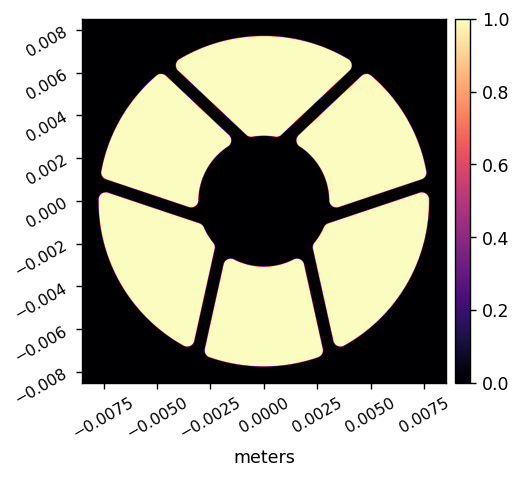

In [41]:
ls_fname = 'LS_SPC-20200610_1000.fits'
ls_sampling = 1.6998849063360116e-05*u.m/u.pixel

spc825ls = fits.open(spcdir_old/ls_fname)
spc825ls_data = spc825ls[0].data
spc825ls.close()

print(spc825ls_data.shape)
arr = np.zeros(shape=(1002, 1002))
# arr[1:,1:] = spc825ls_data
arr[:-1,:-1] = spc825ls_data
spc825ls_data = arr
print(spc825ls_data.shape)

hdr = fits.Header()
hdr['PIXELSCL'] = ls_sampling.value
spc825ls_new = fits.PrimaryHDU(data=spc825ls_data, header=hdr)
spc825ls_new.writeto(spcdir/ls_fname, overwrite=True)
print(spcdir/fname)
misc.myimshow(spc825ls_data, pxscl=ls_sampling)

/groups/douglase/kians-data-files/roman-cgi-phasec-data/spc-wide/SPM_SPC-20200610_1000_rounded9_gray_rotated.fits
(505, 505)


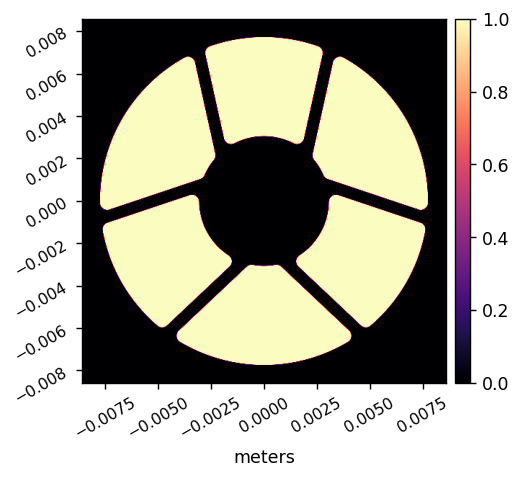

In [40]:
ls_fname = 'LS_SPC-20200610_500.fits'
ls_sampling = 1.6998849063360116e-05*2*u.m/u.pixel

spc825ls = fits.open(spcdir_old/ls_fname)
spc825ls_data = spc825ls[0].data
spc825ls.close()

spc825ls_data = rotate_180(spc825ls_data)

hdr = fits.Header()
hdr['PIXELSCL'] = ls_sampling.value
spc825ls_new = fits.PrimaryHDU(data=spc825ls_data, header=hdr)
spc825ls_new.writeto(spcdir/ls_fname, overwrite=True)
print(spcdir/fname)
print(spc825ls_data.shape)
misc.myimshow(spc825ls_data, pxscl=ls_sampling)